In [1]:
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
import torch.nn.functional as F
import numpy as np
from torch.autograd import Variable
from torchvision import datasets, transforms

In [2]:
##Defining a transform to normalize the data and convert it to tensor
transform =transforms.Compose([transforms.ToTensor()
                               ,transforms.Normalize((0.5),(0.5))
                               ])



In general, the exactly normalization of data isn't super important in neural networks as long as the inputs are at some reasonable scale.with images, normalization to 0 and 1 happens to be very convenient.

The fact that normalization doesn't matter much is only made stronger by use of batch-normalization, which is a function/layer frequently used in neural networks which renormalizes the activations halfway through the network to zero mean and unit variance. 



#### Download and loading the train data

In [ ]:
trainset =datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',download=True,train=True, transform=transform)
trainloader =torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)


####Download and load the test data

In [4]:
testset =datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',download=True,train=False, transform=transform)
testloader =torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

In [5]:

def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 2)

    ax.imshow(image)
    
    return ax

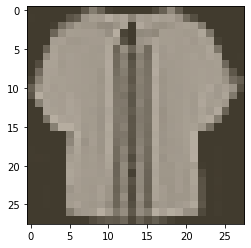

In [6]:
image ,label =next(iter(trainloader))
imshow(image[0,:])

In [ ]:
len(trainset.classes) ##we have 10 classes

10

####Modeling

In this modelling ,we're going to implement a simple Vanille AutoEncoder.

In [7]:
class autoEncoder(nn.Module):
  def __init__(self,**kwargs):
    super().__init__()
    self.encoder = nn.Linear(kwargs["input_shape"],kwargs["hiddenL_shape"])
    self.encode_bottleneck = nn.Linear(kwargs["hiddenL_shape"],kwargs["hiddenL_shape"])
    self.decode_bottleneck = nn.Linear(kwargs["hiddenL_shape"],kwargs["hiddenL_shape"])
    self.decoder = nn.Linear(kwargs["hiddenL_shape"],kwargs["input_shape"])


  def forward(self,x):
    x = F.relu(self.encoder(x))
    x = F.relu(self.encode_bottleneck(x))
    x = F.relu(self.decode_bottleneck(x))

    x_reconstructed = F.tanh(self.decoder(x))
    
    return x_reconstructed

#### Train the Network

####Enable GPU

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
try:
  print("the GPU {} is being used by PyTorch.".format(torch.cuda.get_device_name(0)))
except:
  print()



the GPU Tesla P100-PCIE-16GB is being used by PyTorch.


##### Create the network ,define the criterion and the optimizer

In [32]:
model =autoEncoder(input_shape=784,hiddenL_shape=64)
criterion =nn.MSELoss() ##Mean squared error
optimizer =optim.Adam(model.parameters(),lr=0.003)


In [33]:
##Train the network
epochs =10
running_loss=0
for e in range(epochs):
  running_loss=0
  for images,_ in trainloader:
    images =images.view(images.shape[0],-1)
    target=model(images)

    train_loss =criterion(target,images)

    
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    running_loss += train_loss.item()
    
    # compute the epoch training loss
  running_loss = running_loss / len(trainloader)
    # display the epoch training loss
  print("epoch : {}/{}, loss = {:.6f}".format(e + 1, epochs, running_loss))


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


epoch : 1/10, loss = 0.089480
epoch : 2/10, loss = 0.059022
epoch : 3/10, loss = 0.053670
epoch : 4/10, loss = 0.051204
epoch : 5/10, loss = 0.049612
epoch : 6/10, loss = 0.048431
epoch : 7/10, loss = 0.047730
epoch : 8/10, loss = 0.047182
epoch : 9/10, loss = 0.046725
epoch : 10/10, loss = 0.046297


In [40]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'




dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]
img=img.view(img.shape[0],-1)




# Plot the image and probabilities


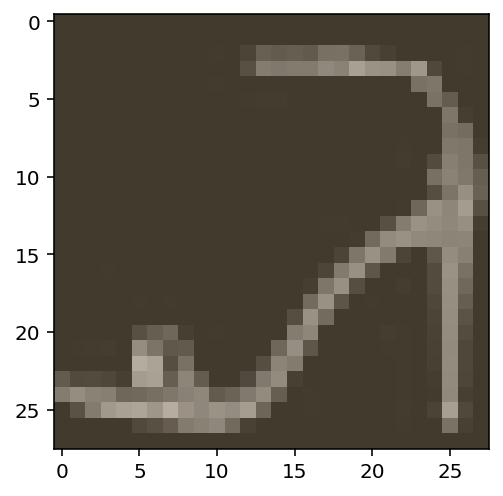

In [41]:
imshow(images[1,:])

In [42]:
# Test out  model reconstruction
reconstructed_img = model(img)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [44]:
reconstructed_img =torch.reshape(reconstructed_img,(1,28,28))


In [38]:

def plot(image, ax=None, title=None, normalize=True):
    
    if ax is None:
        fig, ax = plt.subplots()
    image = image.detach().numpy().transpose((1, 2, 0))
    

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 2)

    ax.imshow(image)
    
    return ax

(<matplotlib.axes._subplots.AxesSubplot at 0x7fa3060df390>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa30609abe0>)

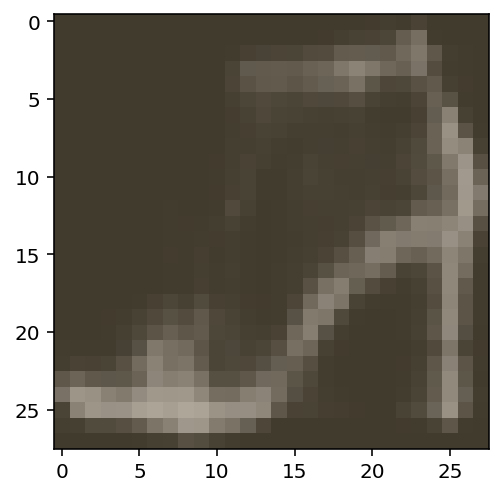

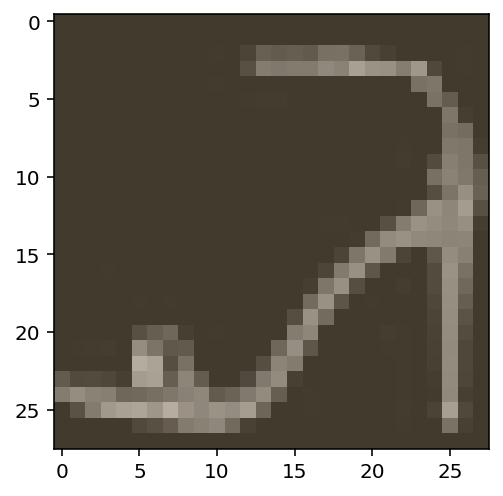

In [45]:
plot(reconstructed_img) ,imshow(images[1,:])